In [1]:
import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt
import tools
import importlib

In [21]:
lmax = 7000

if 0:
    output_path = './maps/colin/'

    lensed_cmb = output_path + 'original/Sehgalsimparams_healpix_4096_KappaeffLSStoCMBfullsky_phi_SimLens_Tsynfastnopell_fast_lmax8000_nside4096_interp2.5_method1_1_lensed_map.fits'
    lensed_cmb_output_name = 'lensed_cmb'
    
    # late-time ksz
    ksz_lt = output_path + 'original/148_ksz_healpix_nopell_Nside4096_DeltaT_uK.fits'
    ksz_lt_output_name = 'ksz_lt'

    phi = output_path + 'original/healpix_4096_KappaeffLSStoCMBfullsky_phi.fits'
    phi_output_name = 'phi'
    
    #kappa = output_path + 'original/healpix_4096_KappaeffLSStoCMBfullsky.fits'
    kappa_output_name = 'kappa'
else:
    output_path = './maps/websky/'
    
    lensed_cmb_alm = './maps/websky/original/lensed_alm.fits'
    lensed_cmb_output_name = 'lensed_cmb'
    
    # late-time ksz
    ksz_lt = './maps/websky/original/ksz.fits'
    ksz_lt_output_name = 'ksz_lt'
    
    # reionization ksz
    ksz_ri = './maps/websky/original/ksz_patchy.fits'
    ksz_ri_output_name = 'ksz_ri'
    
    kappa = './maps/websky/original/kap.fits'
    kappa_output_name = 'kappa'

In [19]:
importlib.reload(tools)

<module 'tools' from '/global/cscratch1/sd/hongbo/new_reion-lens/tools.py'>

In [22]:
lensed_cmb_alm = hp.read_alm(lensed_cmb_alm)
lensed_cmb_cl = hp.alm2cl(lensed_cmb_alm)

In [26]:
ell = np.arange(0, np.size(lensed_cmb_cl), 1)
lensed_cmb_dict = {'ell':ell, 'Cl':lensed_cmb_cl}
lensed_cmb_df = pd.DataFrame(lensed_cmb_dict)
lensed_cmb_df.to_csv(output_path+'lensed_cmb_cl.csv', index=False)

In [20]:
# tools.convert(lensed_cmb, output_path, lensed_cmb_output_name)
tools.convert(ksz_lt, output_path, ksz_lt_output_name)
tools.convert(ksz_ri, output_path, ksz_ri_output_name)
tools.convert(kappa, output_path, kappa_output_name)

/global/homes/h/hongbo/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/global/homes/h/hongbo/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [3]:
tools.convert(phi, output_path, phi_output_name)

/global/homes/h/hongbo/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [4]:
# Get kappa map from phi map
phi_alm = hp.read_alm(output_path + 'phi_alm.fits')
phi_cl = pd.read_csv(output_path + 'phi_cl.csv')

In [8]:
ell = np.arange(0, np.size(phi_cl['ell']), 1)
kappa_alm = hp.almxfl(phi_alm, ell**2/2)
hp.write_alm(output_path+'kappa_alm.fits', kappa_alm, overwrite=True)

In [9]:
kappa_cl = hp.alm2cl(kappa_alm)
kappa_cl_dict = {'ell':ell, 'Cl':kappa_cl}
kappa_df = pd.DataFrame(kappa_cl_dict)
kappa_df.to_csv(output_path+'kappa_cl.csv')

In [10]:
lsd = pd.read_csv(output_path+'lensed_cmb_cl.csv')

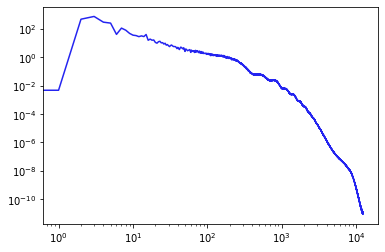

In [11]:
l = lsd['ell']
Cl = lsd['Cl']
plt.loglog(l, Cl)

In [16]:
kappa = pd.read_csv(output_path + 'kappa_cl.csv')
ell = phi['ell']
kappa_cl = kappa['Cl']

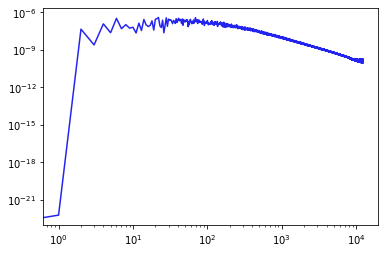

In [17]:
plt.loglog(ell, kappa_cl)